In [1]:
print("Hello World ~Matt Goeckel")

Hello World ~Matt Goeckel


In [3]:
#Import the scikit learn machine learning module
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.target.shape

(1797,)

In [9]:
#sample No. 13
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

It appears to be a three

In [10]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [11]:
#sample No. 22
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [13]:
digits.target[22]
#sample No. 22 is a two

2

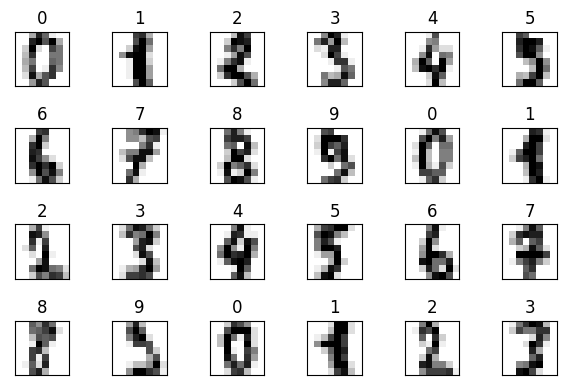

In [14]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

for i in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = i
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()


Samples No. 0 thru 23 are above. No.s 13 and 22, used in above samples, are included.

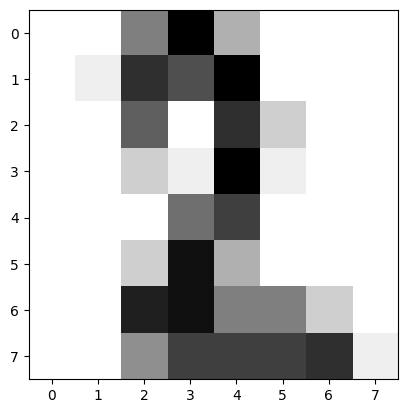

In [16]:
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
#Sample no 22 plotted

In [17]:
#Training and testing set sizes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [18]:
X_train.shape

(1347, 64)

In [19]:
X_test.shape

(450, 64)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [23]:
#Predicting Digit Classes
predicted = knn.predict(X=X_test)
expected = y_test

predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [24]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [25]:
#List all incorrect predictions
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [26]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

97.78%


In [27]:
print(f'{knn.score(X_test, y_test):.2%}')
#Prediction accuracy

97.78%


In [28]:
##      **CASE STUDY PART 2**
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
names =  [str(digit) for digit in digits.target_names]
#Classification reports show precision, recall, the average of the two (f1-score), and support
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



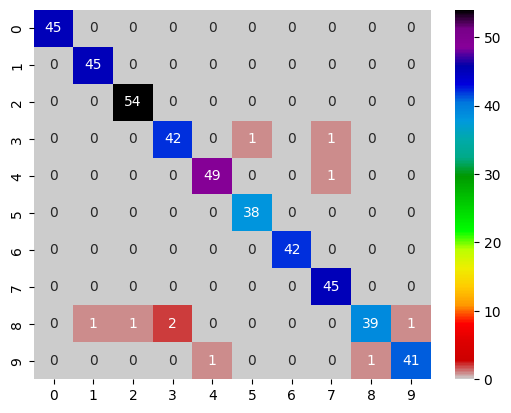

In [35]:
#Now to import and use something more familiar
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

#Seaborn’s graphing functions work with two-dimensional data for heatmaps
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [36]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [39]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [40]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


In [42]:
#Running multiple models to find the best one
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [43]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()
    }

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [44]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


  `

15.4 Case Study: Time Series and Simple Linear Regression

In [46]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [47]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [48]:
X_test.shape

(31, 1)

In [50]:
from sklearn.linear_model import LinearRegression
#Import the linear regression tool

In [51]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [55]:
linear_regression.coef_
#Slope of regression

array([0.01939167])

In [56]:
linear_regression.intercept_
#Intercept of regression

-0.30779820252656975

In [58]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [59]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)

array([38.84399018])

In [60]:
predict(1890)

array([36.34246432])

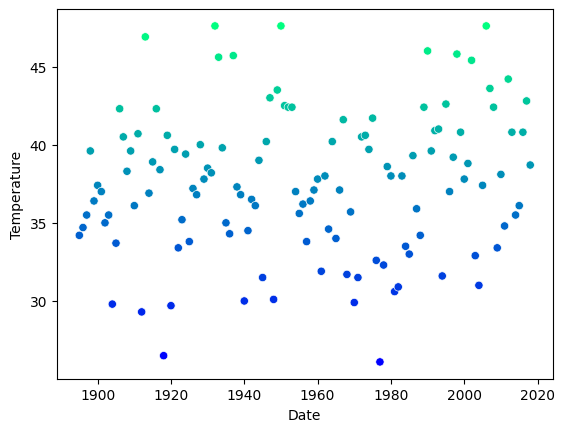

In [69]:
#Seaborn makes some REALLY cool data visualizations
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [70]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [71]:
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

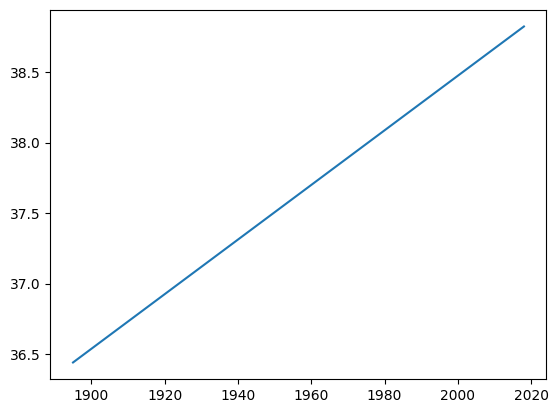

In [72]:
import matplotlib.pyplot as plt

line = plt.plot(x, y)

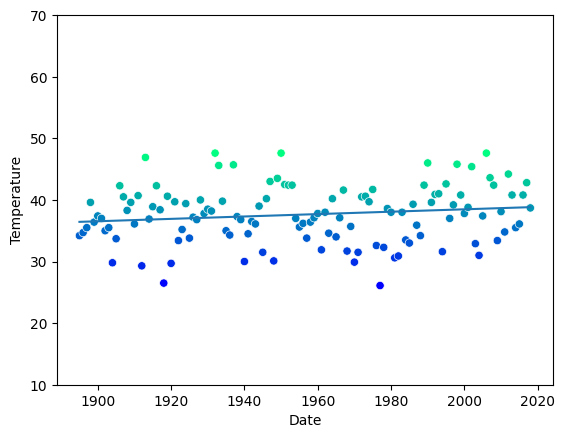

In [74]:
#Put the two together:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)